# install pre requisits


In [0]:
!apt-get install protobuf-compiler python-pil python-lxml python-tk
!pip install Cython
!pip install jupyter
!pip install matplotlib

In [0]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 30632 (delta 4), reused 6 (delta 0), pack-reused 30622
Receiving objects: 100% (30632/30632), 510.52 MiB | 14.62 MiB/s, done.
Resolving deltas: 100% (19243/19243), done.
Checking out files: 100% (3079/3079), done.


In [0]:
!git clone https://github.com/cocodataset/cocoapi.git
!cd cocoapi/PythonAPI; make; cp -r pycocotools /content/models/research/

Cloning into 'cocoapi'...
remote: Enumerating objects: 959, done.
remote: Total 959 (delta 0), reused 0 (delta 0), pack-reused 959
Receiving objects: 100% (959/959), 11.69 MiB | 32.00 MiB/s, done.
Resolving deltas: 100% (571/571), done.
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages

In [0]:
cd /content/models/research

/content/models/research


In [0]:
%set_env PYTHONPATH=/content/models/research:/content/models/research/slim

env: PYTHONPATH=/content/models/research:/content/models/research/slim


In [0]:
!protoc object_detection/protos/*.proto --python_out=.

Test the API

In [0]:
!python object_detection/builders/model_builder_test.py

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Running tests under Python 3.6.8: /usr/bin/python3
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[       OK ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[       OK ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_without_matmul
[       OK ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_without_matmul
[ RUN  

**This takes a while......**

In [0]:
!mkdir /content/models/research/object_detection/images/
!mkdir /content/models/research/object_detection/images/validation
!mkdir /content/models/research/object_detection/images/train

# Build tfrecords

In [0]:
!python object_detection/dataset_tools/create_pet_tf_record.py \
    --label_map_path=object_detection/data/pet_label_map.pbtxt \
    --data_dir=`pwd` \
    --output_dir=`pwd`
!ls *.record

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/content/models/research/object_detection/utils/dataset_util.py:75: FutureWarning: The behavior of this method will change in future versions. Use specific 'len(elem)' or 'elem is not None' test instead.
  if not xml:
pet_train_with_masks.record  pet_val_with_masks.record


# Get the pre trained model for transfer learning

In [0]:
!wget http://storage.googleapis.com/download.tensorflow.org/models/object_detection/faster_rcnn_resnet101_coco_11_06_2017.tar.gz
!tar -xvf faster_rcnn_resnet101_coco_11_06_2017.tar.gz
!cp faster_rcnn_resnet101_coco_11_06_2017/model.ckpt.* .

--2019-09-13 04:37:42--  http://storage.googleapis.com/download.tensorflow.org/models/object_detection/faster_rcnn_resnet101_coco_11_06_2017.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 595490113 (568M) [application/x-tar]
Saving to: ‘faster_rcnn_resnet101_coco_11_06_2017.tar.gz’

faster_rcnn_resnet1 100%[===================>] 567.90M   186MB/s    in 3.1s    

2019-09-13 04:37:45 (186 MB/s) - ‘faster_rcnn_resnet101_coco_11_06_2017.tar.gz’ saved [595490113/595490113]

faster_rcnn_resnet101_coco_11_06_2017/
faster_rcnn_resnet101_coco_11_06_2017/model.ckpt.index
faster_rcnn_resnet101_coco_11_06_2017/model.ckpt.meta
faster_rcnn_resnet101_coco_11_06_2017/frozen_inference_graph.pb
faster_rcnn_resnet101_coco_11_06_2017/model.ckpt.data-00000-of-00001
faster_rcnn_resnet101_coco_11_06_20

In [0]:
!cp object_detection/samples/configs/faster_rcnn_resnet101_pets.config /content/models/research/object_detection/data

# get the config file and edit it to have the right directories

In [0]:
!cp object_detection/samples/configs/faster_rcnn_resnet101_pets.config .
!sed -i "s|PATH_TO_BE_CONFIGURED|/content/models/research|g" faster_rcnn_resnet101_pets.config
!sed -i "s|/content/models/research/pet_label_map.pbtxt|/content/models/research/object_detection/data/pet_label_map.pbtxt|g" faster_rcnn_resnet101_pets.config
!sed -i "s|/content/models/research/pet_train.record|/content/models/research/pet_train_with_masks.record|g" faster_rcnn_resnet101_pets.config
!sed -i "s|/content/models/research/pet_val.record|/content/models/research/pet_val_with_masks.record|g" faster_rcnn_resnet101_pets.config

# *tensorboard*

In [0]:
! wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip ngrok-stable-linux-amd64.zip

--2019-09-13 04:38:57--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.219.201.17, 54.236.200.27, 3.217.182.206, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.219.201.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13607069 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  12.98M  77.3MB/s    in 0.2s    

2019-09-13 04:38:58 (77.3 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13607069/13607069]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
get_ipython().system_raw('tensorboard --logdir /content/models/research --host 0.0.0.0 --port 6006 &')


In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [0]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://f0f99572.ngrok.io


# train the model

In [0]:
!rm -r /content/models/research/object_detection/images/train

rm: cannot remove '/content/models/research/object_detection/images/train': No such file or directory


In [0]:
!mkdir /content/models/research/object_detection/images/test

In [0]:
!mkdir /content/models/research/object_detection/train

In [0]:
mkdir testing

In [0]:
!mkdir /content/models/research/object_detection/train2

In [0]:
!python /content/models/research/object_detection/model_main.py \
    --pipeline_config_path=/content/models/research/object_detection/data/faster_rcnn_resnet101_pets.config \
    --model_dir=/content/models/research/object_detection/train \
    --num_train_steps=3000 \
    --logtostderr=true \
    --alsologtostderr

In [0]:
!zip -r /content/models/research/object_detection/model_mixed.zip /content/models/research/object_detection/train

In [0]:
!zip -r /content/models/research/object_detection/eval2000.zip /content/models/research/object_detection/eval

  adding: content/models/research/object_detection/eval/ (stored 0%)
  adding: content/models/research/object_detection/eval/.ipynb_checkpoints/ (stored 0%)
  adding: content/models/research/object_detection/eval/events.out.tfevents.1568249950.01ce71b314e9 (deflated 56%)
  adding: content/models/research/object_detection/eval/pipeline.config (deflated 64%)


In [0]:
!cp /content/models/research/object_detection/model_mixed.zip /content/drive/My\ Drive/model_mixed.zip


In [0]:
!cp /content/models/research/object_detection/eval3000.zip /content/drive/My\ Drive/eval3000.zip


In [0]:
!mkdir /content/models/research/object_detection/images/train

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp /content/drive/My\ Drive/model_mixed.zip /content/models/research/object_detection

In [0]:
!mkdir /content/models/research/object_detection/model_mixed

In [0]:
!unzip /content/models/research/object_detection/model_mixed.zip -d /content/models/research/object_detection/model_mixed

Archive:  /content/models/research/object_detection/model_mixed.zip
   creating: /content/models/research/object_detection/model_mixed/content/models/research/object_detection/train/
  inflating: /content/models/research/object_detection/model_mixed/content/models/research/object_detection/train/model.ckpt-835.meta  
  inflating: /content/models/research/object_detection/model_mixed/content/models/research/object_detection/train/model.ckpt-2419.meta  
  inflating: /content/models/research/object_detection/model_mixed/content/models/research/object_detection/train/model.ckpt-1618.data-00000-of-00001  
  inflating: /content/models/research/object_detection/model_mixed/content/models/research/object_detection/train/model.ckpt-3000.index  
  inflating: /content/models/research/object_detection/model_mixed/content/models/research/object_detection/train/events.out.tfevents.1568289886.3723bf525bde  
  inflating: /content/models/research/object_detection/model_mixed/content/models/research/obj

In [0]:
!python /content/models/research/object_detection/inference/infer_detections.py \
    --input_type=image_tensor \
    --input_tfrecord_paths=/content/models/research/object_detection/data/validation.record \
    --output_tfrecord_path=/content/models/research/object_detection/data/detections.record \
    --inference_graph=/content/models/research/exported_graphs/frozen_inference_graph.pb



W0913 05:11:57.224868 140177378604928 deprecation_wrapper.py:119] From /content/models/research/object_detection/inference/infer_detections.py:53: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.


W0913 05:11:57.225140 140177378604928 deprecation_wrapper.py:119] From /content/models/research/object_detection/inference/infer_detections.py:53: The name tf.logging.INFO is deprecated. Please use tf.compat.v1.logging.INFO instead.


W0913 05:11:57.225352 140177378604928 deprecation_wrapper.py:119] From /content/models/research/object_detection/inference/infer_detections.py:61: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2019-09-13 05:11:57.237979: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2019-09-13 05:11:57.259578: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value 

In [0]:
!python /content/models/research/object_detection/confusion_matrix.py \
--detections_record=/content/models/research/object_detection/data/detections.record \
--label_map=/content/models/research/object_detection/data/object-detection.pbtxt




# evaluate the model




In [0]:
!mkdir /content/models/research/object_detection/eval1 #run only once

In [0]:
!CUDA_VISIBLE_DEVICES="" 
!python /content/models/research/object_detection/legacy/eval.py \
    --logtostderr \
    --pipeline_config_path=/content/models/research/object_detection/data/faster_rcnn_resnet101_pets.config \
    --checkpoint_dir=/content/models/research/object_detection/model_mixed/content/models/research/object_detection/train \
    --eval_dir=/content/models/research/object_detection/eval1 \
    --max_evals=100

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.






Instructions for updating:
Use object_detection/model_main.py.
W0913 05:21:42.390151 139989131835264 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/absl/app.py:250: main (from __main__) is deprecated and will be removed in a future version.
Instructions for updating:
Use object_detection/model_main.py.

W0913 05:21:42.390352 139989131835264 deprecation_wrapper.py:119] From /content/models/research/object_detection/legacy/eval.py:87: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W0913 05:21:42.390647 139989131835264 deprecation_wrapper.py:119] From /content/models/resea

In [0]:
#!kill 1877
!ps -ef > a.a; cat a.a; ls -l testing



# Convert last checkpoint into a model


In [0]:
!cd /content/models/research

In [0]:
!rm -r  exported_graphs; mkdir exported_graphs

In [0]:
!export CHECKPOINT_NUMBER=3000; python object_detection/export_inference_graph.py \
    --input_type image_tensor \
    --pipeline_config_path /content/models/research/object_detection/data/faster_rcnn_resnet101_pets.config \
    --trained_checkpoint_prefix /content/models/research/object_detection/model_mixed/content/models/research/object_detection/train/model.ckpt-3000 \
    --output_directory /content/models/research/exported_graphs

# Zip the graph

In [0]:
!cd /content/models/research/train
!zip -r tensorboard.zip train

  adding: train/ (stored 0%)
  adding: train/eval_0/ (stored 0%)
  adding: train/eval_0/events.out.tfevents.1567483842.41ba2be1f679 (deflated 46%)
  adding: train/model.ckpt-3000.index (deflated 75%)
  adding: train/model.ckpt-1844.data-00000-of-00001 (deflated 6%)
  adding: train/model.ckpt-1844.meta (deflated 95%)
  adding: train/model.ckpt-0.data-00000-of-00001 (deflated 47%)
  adding: train/checkpoint (deflated 65%)
  adding: train/model.ckpt-3000.meta (deflated 95%)
  adding: train/export/ (stored 0%)
  adding: train/export/Servo/ (stored 0%)
  adding: train/export/Servo/1567484211/ (stored 0%)
  adding: train/export/Servo/1567484211/variables/ (stored 0%)
  adding: train/export/Servo/1567484211/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: train/export/Servo/1567484211/variables/variables.index (deflated 74%)
  adding: train/export/Servo/1567484211/saved_model.pb (deflated 95%)
  adding: train/graph.pbtxt (deflated 97%)
  adding: train/model.ckpt-0.meta (deflate

In [0]:
!zip -r exp_g.zip exported_graphs

updating: exported_graphs/ (stored 0%)
updating: exported_graphs/frozen_inference_graph.pb (deflated 8%)
updating: exported_graphs/model.ckpt.data-00000-of-00001 (deflated 7%)
updating: exported_graphs/model.ckpt.index (deflated 74%)
updating: exported_graphs/checkpoint (deflated 42%)
updating: exported_graphs/model.ckpt.meta (deflated 95%)
updating: exported_graphs/saved_model/ (stored 0%)
updating: exported_graphs/saved_model/saved_model.pb (deflated 8%)
updating: exported_graphs/saved_model/variables/ (stored 0%)
updating: exported_graphs/pipeline.config (deflated 68%)


# prepare for download

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


Upload the file into drive

In [0]:
# Create & upload a file.
uploaded = drive.CreateFile({'title': 'tensorboard.zip'})
uploaded.SetContentFile('tensorboard.zip')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1jj4EQ6g__z-Si4LLMqEMdL14RPLa0k9S


# Monitor the loss convergence without tensorboard

In [0]:
import tensorflow as tf
import re


for event in tf.train.summary_iterator('train/events.out.tfevents.1525935471.f00cf4d2a1b5'):
    for value in event.summary.value:
        if value.tag == 'Losses/Loss/RPNLoss/objectness_loss':
            if value.HasField('simple_value'):
                print(value.simple_value)

DataLossError: ignored

# Utility cells

In [0]:
!uptime #know how long you have to use this instance

 22:47:02 up 11 min,  0 users,  load average: 0.07, 0.26, 0.27


In [0]:
!python test1.py Pets.jpg

In [0]:
#!rm test1.py
!wget http://tegacaypharmacy.com/wp-content/uploads/2016/02/Pets.jpg

--2018-05-10 10:32:53--  http://tegacaypharmacy.com/wp-content/uploads/2016/02/Pets.jpg
Resolving tegacaypharmacy.com (tegacaypharmacy.com)... 192.254.231.160
Connecting to tegacaypharmacy.com (tegacaypharmacy.com)|192.254.231.160|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3466906 (3.3M) [image/jpeg]
Saving to: ‘Pets.jpg’

Pets.jpg            100%[===================>]   3.31M  6.50MB/s    in 0.5s    

2018-05-10 10:32:54 (6.50 MB/s) - ‘Pets.jpg’ saved [3466906/3466906]



In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving test1.py to test1.py
User uploaded file "test1.py" with length 1570 bytes


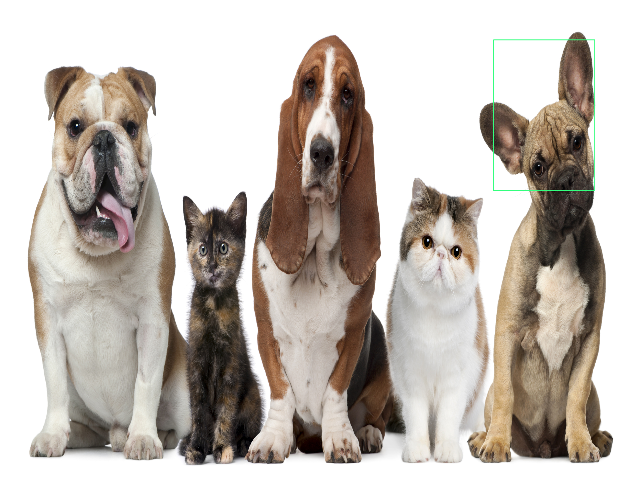

In [0]:
from IPython.display import Image
Image("out.png", width=640, height=480)

In [0]:
!grep -4 32 object_detection/data/pet_label_map.pbtxt



  name: 'scottish_terrier'
}

item {
  id: 32
  name: 'shiba_inu'
}

item {
